<!DOCTYPE html>
<html>
<head>
    <style>
        @media only screen and (max-width: 600px) {
            .profile-card {
                width: 90vw; /* Full width */
                min-width: initial; /* Override min-width */
                padding: 10px; /* Smaller padding */
            }
            .profile-card h3 {
                font-size: 1em; /* Adjust heading size for small screens */
            }
            .profile-card p {
                font-size: 0.8em; /* Adjust paragraph size for small screens */
            }
            .profile-card img[src*="icons8.com"] {
                width: 24px; /* Smaller icons for social links */
                height: 24px;
                margin-left: initial; /* Override specific margin-left for GitHub icon */
            }
            .profile-card img[alt=""] {
                top: 10px;
                right: 10px;
                width: 60px; /* Smaller profile picture size */
                height: 60px;
            }
        }
    </style>
</head>
<body>
    <div class="profile-card" style="border: 2px solid #F0E68C; padding: 20px; border-radius: 10px; background-color: #2E2E2E; width: 50vw; max-width: 800px; min-width: 300px; margin: 0 auto; position: relative; color: white;">
        <h3 style="color: upwhite;"><strong>Author Information</strong></h3>
        <p><strong>Name:</strong> Haseeb Ahmad</p>
        <p><strong>Project:</strong> Car Price Prediction</p>
        <p><strong>Code Submission Date :</strong>26/10/2024 </p>
        <p><strong>Contact Details :</strong> </p>
        <a href="https://github.com/HaseebYousafxai/" target="_blank">
            <img src="https://img.icons8.com/color/48/000000/github.png" alt="GitHub" style="margin-right: 10px;margin-left: 250px">
        </a>
        <a href="https://discord.com/channels/haseebahmad./" target="_blank">
            <img src="https://img.icons8.com/color/48/000000/discord.png" alt="Discord" style="margin-right: 10px;">
        </a>
        <a href="https://instagram.com/haseeb_yousafxai?utm_source=qr&igshid=MzNlNGNkZWQ4Mg%3D%3D/" target="_blank">
            <img src="https://img.icons8.com/color/48/000000/instagram-new.png" alt="Instagram" style="margin-right: 10px;">
        </a>
        <a href="https://www.linkedin.com/in/haseebahmadiuse/" target="_blank">
            <img src="https://img.icons8.com/color/48/000000/linkedin.png" alt="LinkedIn" style="margin-right: 10px;">
        </a>
        <a href="mailto:haseebyousafxai81@gmail.com.com">
            <img src="https://img.icons8.com/color/48/000000/email.png" alt="Email">
        </a>
    </div>
</body>
</html>


# **0.0 Overview**

# **1.0 Import Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **2.0 Load Dataset**

In [4]:
df = pd.read_csv("car data.csv")


# **3.0 Data Preprocessing**

In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
print(f"The number of columns in the dataset are: {df.shape[1]}\nThe number of rows in the dataset are: {df.shape[0]}")

The number of columns in the dataset are: 9
The number of rows in the dataset are: 301


## **3.1 Check For Missing Values**

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## **3.2 Checking for Duplicates**

In [11]:
df.duplicated().sum()

2

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().any()

False

# **4.0 Data Visualization**

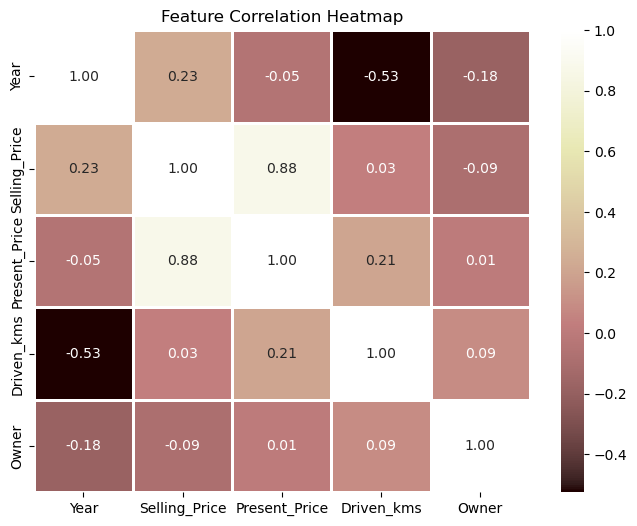

In [14]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

numerical_df = df[numerical_columns]

plt.figure(figsize=(8,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap = 'pink',  linewidths=1,fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

> **Observations**
1. **Strong Positive Correlation**: There is a strong positive correlation between `Selling_Price` and `Present_Price` (0.88), suggesting that the current market price of a car is highly related to its selling price.

2. **Negative Correlation between Year and Driven_kms**: The `Year` of the vehicle has a notable negative correlation with `Driven_kms` (-0.53), indicating that newer cars tend to have been driven less, which is typically expected as newer vehicles are likely to have lower mileage.

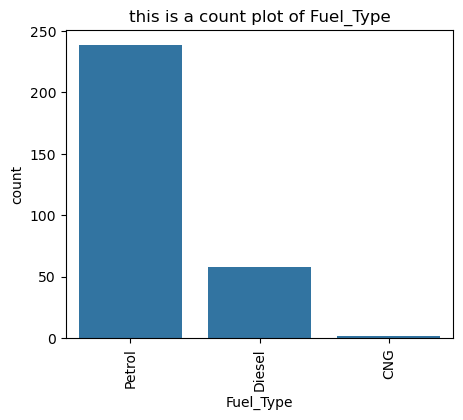

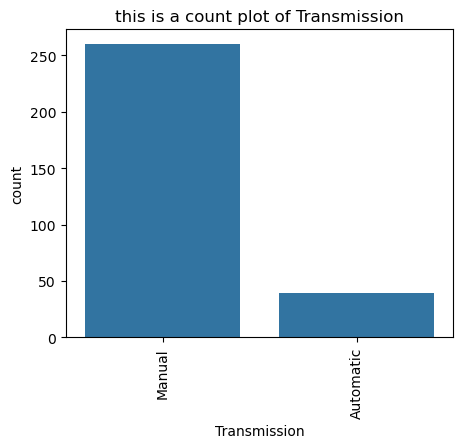

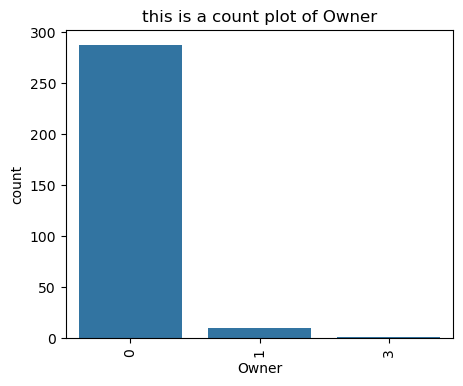

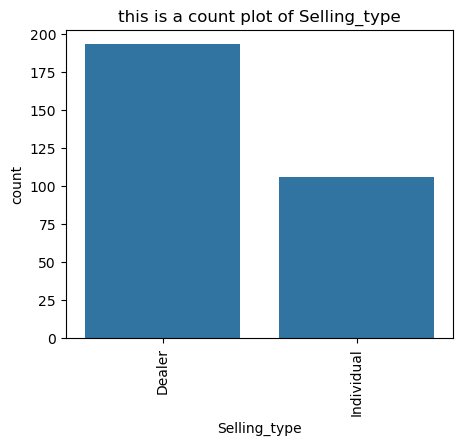

In [15]:
columns = ['Fuel_Type', 'Transmission', 'Owner', 'Selling_type']

for column in columns:
    plt.figure(figsize = (5,4))
    sns.countplot(x = column, data = df)
    plt.title(f'this is a count plot of {column}')
    plt.xticks(rotation=90)
    plt.show()

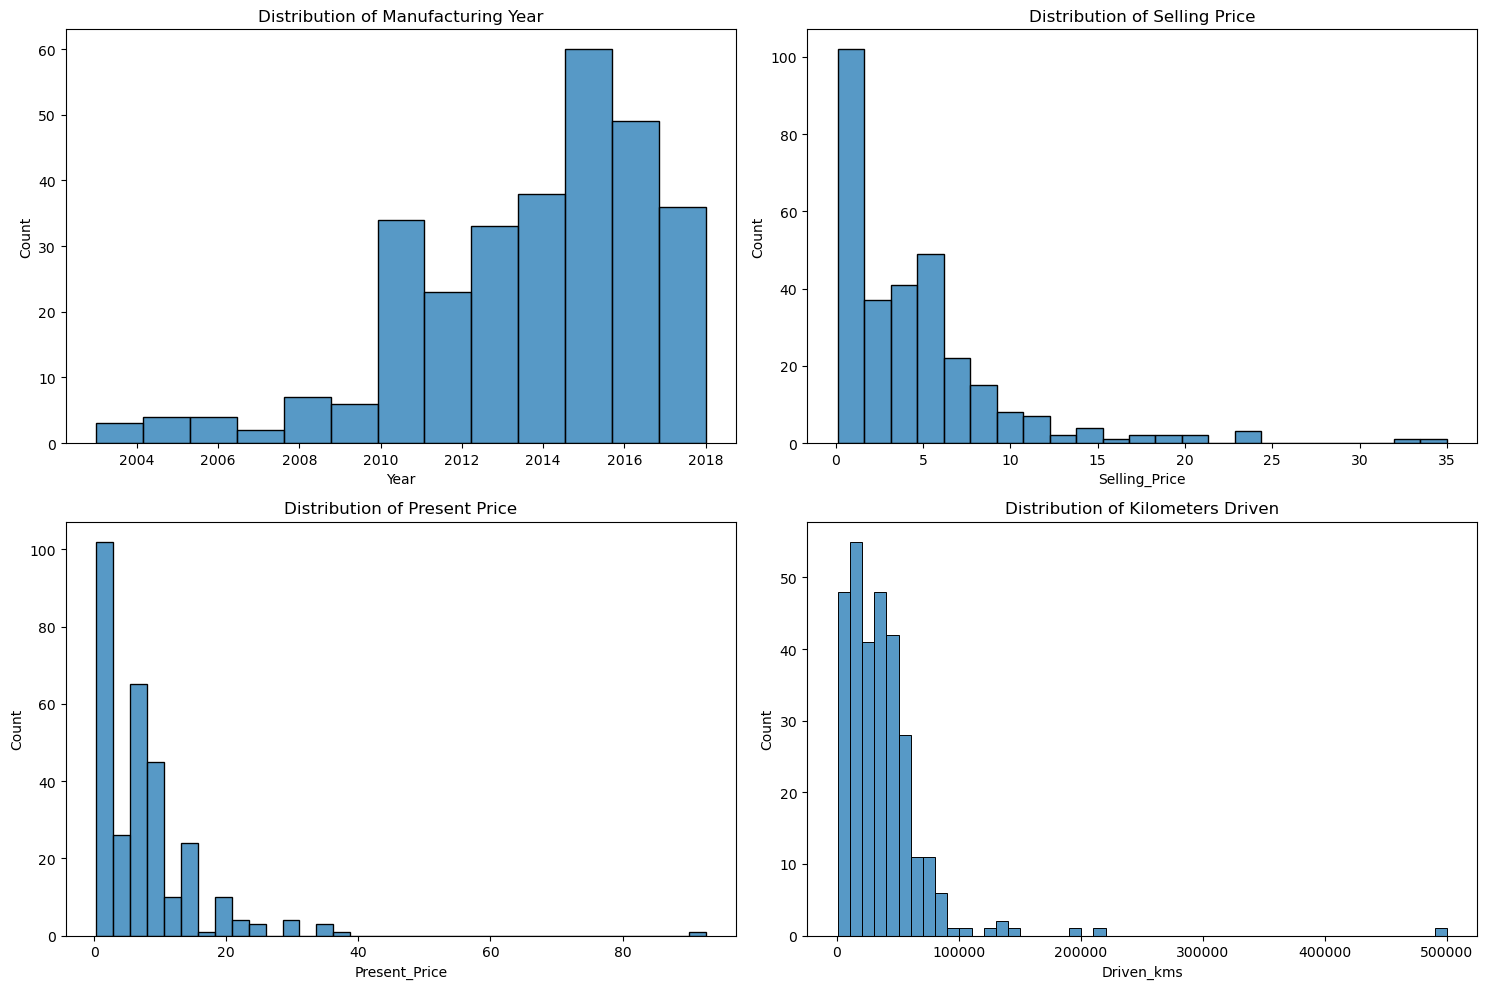

In [16]:
plt.figure(figsize=(15, 10))
    
    # Year Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Year')
plt.title('Distribution of Manufacturing Year')
    
    # Selling Price Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Selling_Price')
plt.title('Distribution of Selling Price')
    
    # Present Price Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Present_Price')
plt.title('Distribution of Present Price')
    
    # Driven KMs Distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Driven_kms')
plt.title('Distribution of Kilometers Driven')    
plt.tight_layout()
plt.show()

# **5.0 Feature Engineering**

In [17]:
df['car_age'] = 2024 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


# **6.0 Data Transformation**

In [18]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
car_age            int64
dtype: object

In [ ]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [20]:
df['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [21]:
df['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [22]:
df['Fuel_Type']= df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

In [23]:
df = pd.get_dummies(df, columns = ['Selling_type','Transmission'])

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,car_age,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,10,True,False,False,True
1,sx4,2013,4.75,9.54,43000,1,0,11,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,0,7,True,False,False,True
3,wagon r,2011,2.85,4.15,5200,0,0,13,True,False,False,True
4,swift,2014,4.60,6.87,42450,1,0,10,True,False,False,True


In [24]:
df.dtypes

Car_Name                    object
Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Fuel_Type                    int64
Owner                        int64
car_age                      int64
Selling_type_Dealer           bool
Selling_type_Individual       bool
Transmission_Automatic        bool
Transmission_Manual           bool
dtype: object

In [25]:
bool_columns = ['Selling_type_Dealer','Selling_type_Individual','Transmission_Automatic','Transmission_Manual']
df[bool_columns] = df[bool_columns].astype('int64')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,car_age,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,10,1,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,11,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,7,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,13,1,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,10,1,0,0,1


# **7.0 Model Building**

In [26]:
X = df.drop(['Car_Name','Selling_Price'], axis=1)
y = df['Selling_Price']

## **7.1 Features Scaling**

In [27]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
def evaluation(y, predictions):
    return {
        'MAE': mean_absolute_error(y, predictions),
        'MSE': mean_squared_error(y, predictions),
        'RMSE': np.sqrt(mean_squared_error(y, predictions)),
        'R-squared': r2_score(y, predictions)
    }

## **7.1 Linear Regression Model**

In [30]:
 # Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
    
    # Predictions
y_pred = lr_model.predict(X_test)
    
    # Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
    
print("Evaluation Results for LinearRegression")
print("------------------------------")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print("Model: LinearRegression")
    

Evaluation Results for LinearRegression
------------------------------
MAE: 1.5408119549693882
MSE: 6.67544410049312
RMSE: 2.5836880811144987
R-squared: 0.7409934356413206
Model: LinearRegression


## **7.2 Random Forest Model**

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
    
    # Predictions
y_pred = rf_model.predict(X_test)
    
    # Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
    
print("Evaluation Results for RandomForestRegressor")
print("------------------------------")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print("Model: RandomForestRegressor")

Evaluation Results for RandomForestRegressor
------------------------------
MAE: 1.5673966666666674
MSE: 14.790662133000007
RMSE: 3.845862989369227
R-squared: 0.4261237865245012
Model: RandomForestRegressor


## **7.3 Gradient Boosting Model**

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
    
    # Predictions
y_pred = gb_model.predict(X_test)
    
    # Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
    
print("Evaluation Results for GradientBoostingRegressor")
print("------------------------------")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print("Model: GradientBoostingRegressor")

Evaluation Results for GradientBoostingRegressor
------------------------------
MAE: 1.21579809956626
MSE: 7.7845212630702365
RMSE: 2.7900754941524855
R-squared: 0.6979613525074732
Model: GradientBoostingRegressor


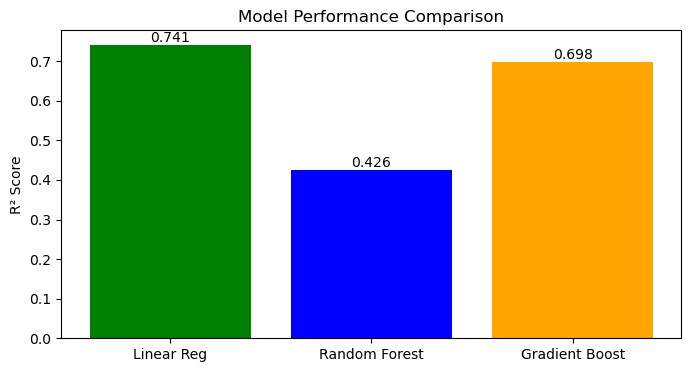

In [33]:
def plot_model_comparison(lr_model, rf_model, gb_model, X_test, y_test):
    # Get predictions and calculate scores
    models = [lr_model, rf_model, gb_model]
    preds = [model.predict(X_test) for model in models]
    r2_scores = [r2_score(y_test, pred) for pred in preds]
    
    # Plot
    plt.figure(figsize=(8, 4))
    bars = plt.bar(['Linear Reg', 'Random Forest', 'Gradient Boost'], 
                   r2_scores, 
                   color=['green', 'blue', 'orange'])
    
    # Add value labels
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'{bar.get_height():.3f}', ha='center', va='bottom')
    
    plt.ylabel('R² Score')
    plt.title('Model Performance Comparison')
    plt.show()

# Usage
plot_model_comparison(lr_model, rf_model, gb_model, X_test, y_test)

In [35]:
import pickle
# Save both scaler and model
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(lr_model, open('linear_model.pkl', 'wb'))